<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50

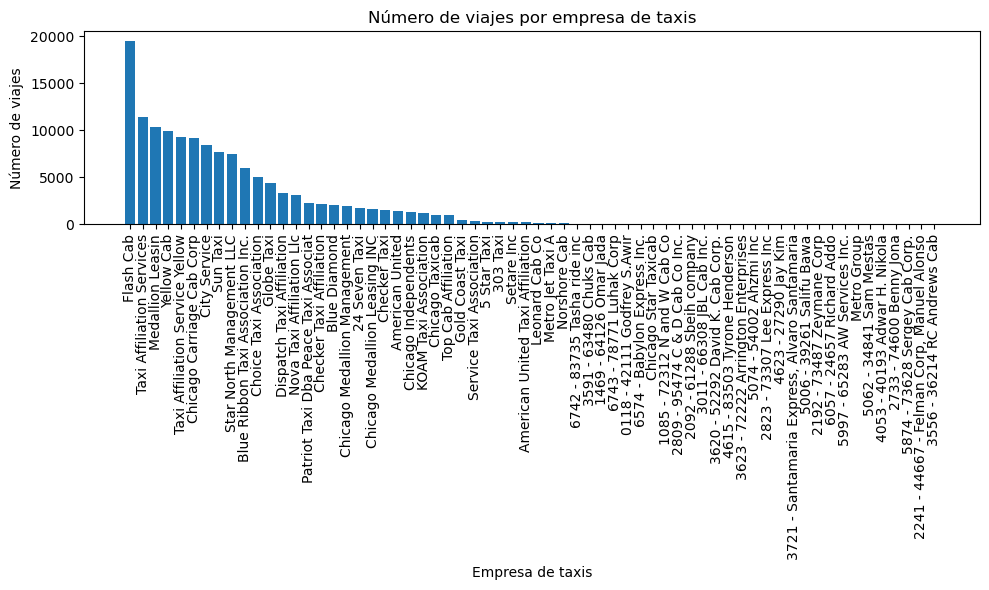

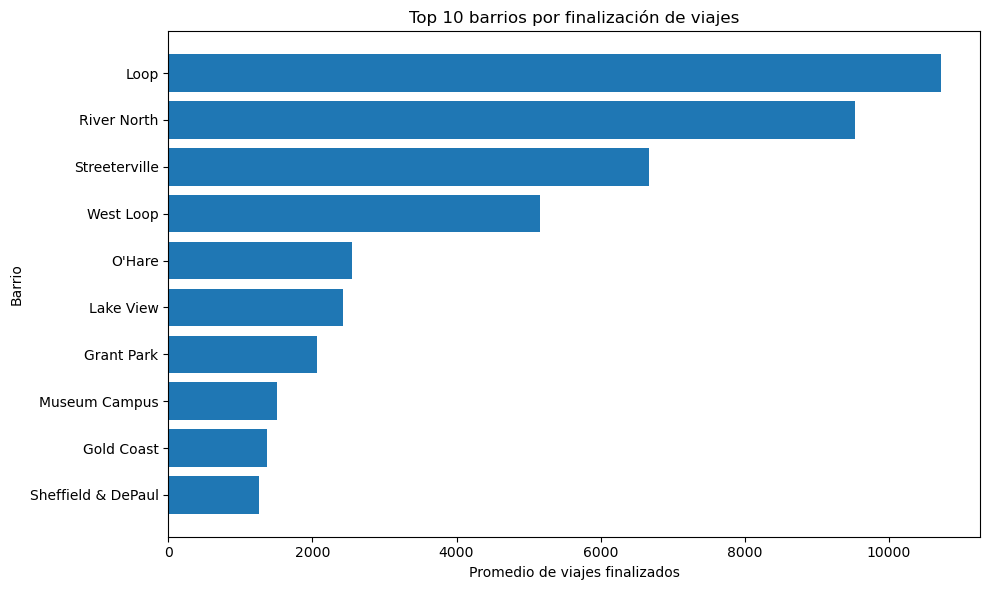

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

# ===========================
# 1️⃣  importar PRIMER dataset
# ===========================
base_path = r"C:\Users\mateg\Documents\CASA\Estudio\Tripleten\SPRINTS\Sprint 8\SQL\trip-analysis"

# ===========================
# 2️⃣ Cargar datasets (CSV)
# ===========================
df_company_trips = pd.read_csv(os.path.join(base_path, "moved_project_sql_result_01.csv"))

# Verifica si los otros CSV existen en la carpeta, ajusta nombres si es necesario
df_location_trips = pd.read_csv(os.path.join(base_path, "project_sql_result_04.csv"))
df_trips_loop_ohare = pd.read_csv(os.path.join(base_path, "project_sql_result_07.csv"))

# ===========================
# 3️⃣ estudio de PRIMER dataset
# ===========================
print(df_company_trips.info())
print(df_company_trips.describe())
print(df_location_trips.info())
print(df_location_trips.describe())
print(df_trips_loop_ohare.info())
print(df_trips_loop_ohare.describe())
df_company_trips.dtypes

# ===========================
# 4️⃣ Crear trip_analysis consolidado
# ===========================
trip_analysis = pd.DataFrame({
    'company_name': df_company_trips['company_name'],
    'trips_amount': df_company_trips['trips_amount'],
    'top_neighborhood': df_location_trips.sort_values('average_trips', ascending=False)['dropoff_location_name'].values[:len(df_company_trips)]
})

# Guardar trip_analysis a CSV
output_csv = os.path.join(base_path, "trip_analysis.csv")
trip_analysis.to_csv(output_csv, index=False)
print(f"CSV guardado correctamente")

# ===========================
# 5️⃣ Gráfico 1: viajes por empresa
# ===========================
df_company_sorted = df_company_trips.sort_values(by='trips_amount', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(df_company_sorted['company_name'], df_company_sorted['trips_amount'])
plt.xticks(rotation=90)
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.title('Número de viajes por empresa de taxis')
plt.tight_layout()
plt.show()

# ===========================
# 6️⃣ Gráfico 2: top 10 barrios por finalización
# ===========================
top_10_neighborhoods = df_location_trips.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xlabel('Promedio de viajes finalizados')
plt.ylabel('Barrio')
plt.title('Top 10 barrios por finalización de viajes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
Conclusiones gráfico 1 y explicación de resultados

Gráfico 1: De acuerdo a lo observado en el gráfico anterior, podemos concluir que, entre el 15 y 16 de noviembre de 2017:

Una alta concentración de viajes, se concentró en pocas empresas
La compañía Flash Cab lidera con gran ventaja al resto de competidoras, aventajó a la segunda en el top con una diferencia de más de 7.500 viajes
Por otra parte, existió un gran número de empresas con un número extremadamente bajo de viajes realizado
Lo anterior sugiere una distribución desigual de la demanda entre los proveedores del servicio.


Conclusiones gráfico 2 y explicación de resultados

Gráfico 2:

Después de revisar el gráfico anterior, referente a los barrios destino de los recorridos de taxi en el mes de noviembre de 2017, podemos cocluir que:

Barrios como Loop y Rivernorth, recibieron cerca de 10.000 viajes durante dicho mes, ventajando por cerca de 8.000 a los últimos de la lista que fueron Sheffiel y Depaul.

Lo anterior permite intuir que los barrios que encabezan el top, son zonas de ata actividad ya que en ellos encontramos posiblemente, centros de negocios, turísticos o de transporte.



In [ ]:
# Hipótesis: "La DURACIÓN PROMEDIO de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
#  Ejecución de la prueba de Hipótesis: 

from scipy import stats

# Cargar el dataset de viajes del Loop a O'Hare
df_trips_loop_ohare = pd.read_csv("C:/Users/mateg/Documents/CASA/Estudio/Tripleten/SPRINTS/Sprint 8/SQL/trip-analysis/project_sql_result_07.csv")

# Convertir la columna de fecha y hora a formato datetime
df_trips_loop_ohare['start_ts'] = pd.to_datetime(df_trips_loop_ohare['start_ts'])

# Filtrar únicamente los viajes realizados en sábado (lunes=0, sábado=5)
df_saturday = df_trips_loop_ohare[
    df_trips_loop_ohare['start_ts'].dt.dayofweek == 5
]

# Duración de viajes en sábados lluviosos
rainy = df_saturday[
    df_saturday['weather_conditions'] == 'Bad'
]['duration_seconds']

# Duración de viajes en sábados no lluviosos
non_rainy = df_saturday[
    df_saturday['weather_conditions'] == 'Good'
]['duration_seconds']

# Nivel de significación
alpha = 0.05

# Prueba t de Welch (H₀: medias iguales)
t_stat, p_value = stats.ttest_ind(
    rainy,
    non_rainy,
    equal_var=False
)

# Decisión estadística
if p_value < alpha:
    print("Se rechaza la hipótesis nula (H₀)")
else:
    print("No se rechaza la hipótesis nula (H₀)")

#prueba P value 
rainy.mean(), non_rainy.mean()


Se rechaza la hipótesis nula (H₀)


(np.float64(2427.2055555555557), np.float64(1999.6756756756756))

Explicación del resultado de la pueba de Hipótesis:

Antes de proceder con la explicación del resultado, es preciso afirmar que, la prueba estadística se realizó contrastando la hipótesis nula frente a la alternativa mediante una prueba t de Student para muestras independientes, utilizando un nivel de significación del 5 %.

Con base en o anterior y teniendo en cuenta que el resultado fue: "Se rechaza la prueba de hipótesis nula(H0)", entonces la CONCLUSIÓN es la siguiente:

podemos afirmar lo siguiente: Si existe una diferecia estadísticamente significativa en la duracion promedio de los víajes desde el barrio Loop hasta el Aeropuerto Internacional, los días sábados lluviosos.
Complemento: Resultado prueba P Value:

A partir de los resultados: (2427.2055555555557, 1999.6756756756756), se puede afirmar que:

La duración promedio Loop-Aeropuerto en sábados lluviosos = 2427 segundos
La duración promedio Loop-Aeropuerto en sábados NO lluviosos = 2000 segundos.


C:\Users\mateg\AppData\Local\Temp\ipykernel_12668\1071958458.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


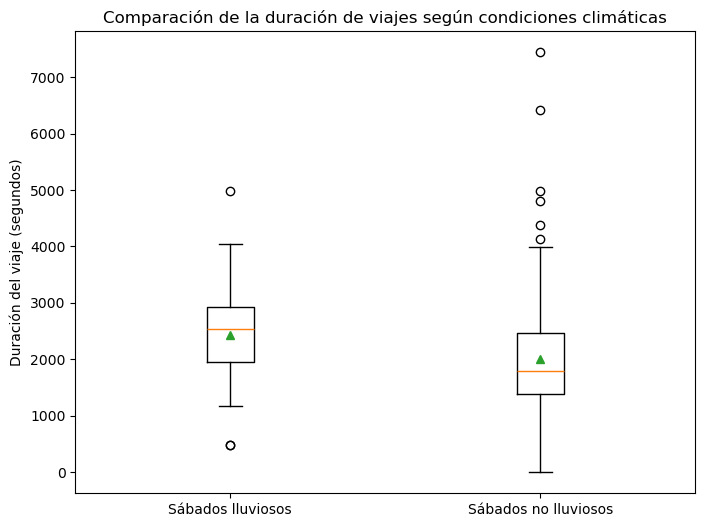

In [6]:
#Gráfico Hipótesis

# Crear un boxplot para comparar las duraciones
plt.figure(figsize=(8, 6))
plt.boxplot(
    [rainy, non_rainy],
    labels=['Sábados lluviosos', 'Sábados no lluviosos'],
    showmeans=True
)

plt.ylabel('Duración del viaje (segundos)')
plt.title('Comparación de la duración de viajes según condiciones climáticas')
plt.show()

Explicación del Gráfico:

El boxplot refuerza y soporta lo afirmado anteriormente ya que en el muestra que la distribución de la duración de los viajes en sábados lluviosos se encuentra desplazada hacia valores más altos en comparación con los sábados no lluviosos. Esta diferencia visual es consistente con el resultado de la prueba de hipótesis, en la que se rechazó la hipótesis nula.